<a href="https://colab.research.google.com/github/Grace-Gitome/DS_Track/blob/main/Machine_Learning_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Predicting energy Efficiency of buildings.

Regression is a statistical method that attempts to dtermine the strength and character of relationship between one independent variable and a series of dependent variables.

### Simple linear regression

A simple linear regression model estimates the relationship between two quantitative variables where one is referred to as the independent variable and the other the dependent variable.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ENB2012_data.xlsx to ENB2012_data.xlsx


In [2]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_excel('ENB2012_data.xlsx')

In [5]:
#renaming columns
columnNames ={'X1':'Relative Compactness',
               'X2':'Surface Area',
               'X3':'Wall Area',
               'X4':'Roof Area',
               'X5':'Overall Height',
               'X6':'Orientation',
               'X7':'Glazing Area',
               'X8':'Glazing Area Distribution',
               'Y1':'Heating Load',
               'Y2':'Cooling Load'}
               
df = df.rename(columns = columnNames)

In [6]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [7]:
#Select a sample of the dataset

simpleLinearRegressionDF =df[['Relative Compactness','Cooling Load']].sample(15, random_state = 2)
simpleLinearRegressionDF

,Relative Compactness,Cooling Load
158,0.82,25.35
251,0.86,31.28
631,0.90,33.31
757,0.66,17.79
689,0.79,47.59
573,0.62,17.21
553,0.74,17.25
728,0.86,29.69
183,0.66,13.83
515,0.69,14.60


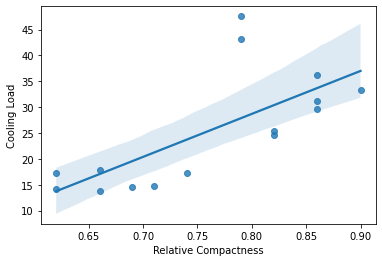

In [8]:
#regression plot
sns.regplot(x='Relative Compactness',
            y ='Cooling Load',
            data = simpleLinearRegressionDF)

Collinearity and assumptions for linear regression.
 1. Linearity - the relationship between the variables s linear such that a straight line is the best of fit.<br>

2. Homescedasticity - the residuals or prediction error are of equal or constance variance.<br>

3. Normality - the residuals are of a normal distribution.<br>

4. Independence of observations.<br>
In multiple linear regression where there are more predictors, it is assumed that the variables are independent of each other without any strong correlation between them.<br>

5. Residual sum of squares and minimizing the cost function.<br>
Cost function is a measure of the performance of a model - how far or close the predicted values are to the real values.<br> In linear regression, the cost function can be defined as the sum of squared errors in a training set.<br>

6. Gradient descent and coordinate descent algorithm.<br>
Gradient descent is an optimzation algorithm that mnimizes a cost function by specifying the direction to move towards to obtain a local or global minima.This is done by initially starting with random values then iteratively updating the values until the minimum cost is obtained.  A learning rate is usually chosen to determine the step size to be taken for each iteration. It is important to carefully select this parameter because, if a small step is chosen, it will take a long time to converge to the minimum cost while if too large, it can result in an overshoot surpassing the location of the minimum cost.


# Multiple Linear Regression.

COLLINEARITY<br>
Correlation is a measure used to describe the linear relationship between two variables.<br>

Correlation values range from -1 for a perfect negative correlation (an increase in one variable causes a decrease in the other variable) to +1 for a perfect positive correlation (both variables increase or decrease together).<br>

A correlation value of 0 indicates that there is absolutely no correlation between both variables.<br>
<br>

MULTICOLLINEARITY<br>
A situation where two or more of the predictors have a strong correlation.<br>

Since predictors are expected to be independent, when multicollinearity occurs, the correlated variables cannot independently contribute to predicting the value of the response variable.<br>

POLYNOMIAL REGRESSION<BR>

A polynomial regression model is considered a linear regression model that can be used when a curvilinear relationship exists between the predictors and the response variable.<BR>




#Measuring Regression Performance

How well a regression model performs can be obtained by how close the predicated value is to the ground truth.<br>

Evaluation metrics for performance:<br>
1. Mean Absolute Error (MAE) <br>
This is the sum of the average of the absolute error between the predicted values and true values.
The smaller the MAE the better the model.
If the MAE is 0, the model is perfect and accurately predicts the results which is almost impossible.

In [17]:
#Mean Absolute Error.

#scikit-learn /sklearn library for machine learning in python.
#First normalize our dataset to a common scale using min max scaler.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df),columns =df.columns)
features_df = normalised_df.drop(columns = ['Heating Load','Cooling Load'])
heating_target = normalised_df['Heating Load']

#Now we split our dataset into training and testing dataset.
#Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features_df, heating_target, test_size = 0.3, random_state=1)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

#fit the model to the training dataset
linear_model.fit(x_train,y_train)

#obtain the predictions
predicted_values =linear_model.predict(x_test)

#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,predicted_values)
round(mae,3)


0.063